In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Ransomeware_Merged_File/ransomware_merged.csv')
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
df.shape

(2830743, 79)

In [5]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [6]:
df.isnull().sum().sum()

1358

In [7]:
cols_with_missing = df.columns[df.isnull().any()]
print(cols_with_missing)

Index(['Flow Bytes/s'], dtype='object')


In [8]:
df['Flow Bytes/s'].describe()

,Flow Bytes/s
count,2.829385e+06
mean,inf
std,NaN
min,-2.610000e+08
25%,1.193197e+02
50%,4.595549e+03
75%,1.666667e+05
max,inf


In [9]:
df['Flow Bytes/s']

,Flow Bytes/s
0,4.000000e+06
1,1.100917e+05
2,2.307692e+05
3,3.529412e+05
4,4.000000e+06
...,...
2830738,8.194940e+03
2830739,1.376543e+06
2830740,4.512195e+05
2830741,4.272221e+02


In [10]:
import pandas as pd
import numpy as np

# Count the number of rows with infinite values in the 'Flow Bytes/s' column
infinite_rows_count = df['Flow Bytes/s'].isin([np.inf, -np.inf]).sum()

print(f"Number of rows with infinite values in 'Flow Bytes/s': {infinite_rows_count}")

Number of rows with infinite values in 'Flow Bytes/s': 1509


In [11]:
import pandas as pd
import numpy as np

# Check for infinite values and count them
infinite_counts = df.isin([np.inf, -np.inf]).sum()

# Filter to show only columns with infinite values
columns_with_infinite_values = infinite_counts[infinite_counts > 0]

# Display the columns and their respective counts of infinite values
print("Columns with infinite values and their counts:")
print(columns_with_infinite_values)

Columns with infinite values and their counts:
Flow Bytes/s       1509
 Flow Packets/s    2867
dtype: int64


In [12]:
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = df.corr(method='pearson', numeric_only=True)

# Set the threshold
threshold = 0.5

# Get correlations with 'Flow Bytes' and 'Flow Duration'
flow_bytes_correlations = correlation_matrix['Flow Bytes/s']
flow_duration_correlations = correlation_matrix[' Flow Packets/s']

# Filter columns with correlations above the threshold
flow_bytes_filtered = flow_bytes_correlations[flow_bytes_correlations.abs() > threshold]
flow_duration_filtered = flow_duration_correlations[flow_duration_correlations.abs() > threshold]

# Print the columns that correlate with 'Flow Bytes' and 'Flow Duration'
print("Columns correlated with 'Flow Bytes/s' (threshold > 0.5):")
print(flow_bytes_filtered)

print("\nColumns correlated with 'Flow Packets/s' (threshold > 0.5):")
print(flow_duration_filtered)

Columns correlated with 'Flow Bytes/s' (threshold > 0.5):
Flow Bytes/s    1.0
Name: Flow Bytes/s, dtype: float64

Columns correlated with 'Flow Packets/s' (threshold > 0.5):
 Flow Packets/s    1.000000
Fwd Packets/s      0.987562
Name:  Flow Packets/s, dtype: float64


In [13]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.0,53.0,80.0,443.0,65535.0
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-13.0,155.0,31316.0,3204828.5,119999998.0
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.0,2.0,2.0,5.0,219759.0
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.0,1.0,2.0,4.0,291922.0
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.0,12.0,62.0,187.0,12900000.0
...,...,...,...,...,...,...,...,...
Active Min,2830743.0,5.829582e+04,5.770923e+05,0.0,0.0,0.0,0.0,110000000.0
Idle Mean,2830743.0,8.316037e+06,2.363008e+07,0.0,0.0,0.0,0.0,120000000.0
Idle Std,2830743.0,5.038439e+05,4.602984e+06,0.0,0.0,0.0,0.0,76900000.0
Idle Max,2830743.0,8.695752e+06,2.436689e+07,0.0,0.0,0.0,0.0,120000000.0


In [14]:
df.corr(method='pearson', numeric_only=True).T

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Destination Port,1.000000,-0.151680,-0.004236,-0.003947,0.011145,-0.003082,0.097926,-0.045388,0.140220,0.128861,...,-0.003226,0.000897,-0.035562,-0.043717,-0.051859,-0.023194,-0.112585,0.010399,-0.108185,-0.114614
Flow Duration,-0.151680,1.000000,0.020857,0.019670,0.065456,0.016186,0.273308,-0.105230,0.143689,0.234437,...,0.015942,-0.001357,0.189299,0.241060,0.294034,0.121171,0.768034,0.243154,0.779527,0.738328
Total Fwd Packets,-0.004236,0.020857,1.000000,0.999070,0.365508,0.996993,0.009358,-0.002989,0.000032,0.001403,...,0.887387,-0.000184,0.039937,0.008329,0.030459,0.041283,0.001820,0.000809,0.001906,0.001670
Total Backward Packets,-0.003947,0.019670,0.999070,1.000000,0.359451,0.994429,0.009039,-0.002600,-0.000333,0.001026,...,0.882566,0.000018,0.038963,0.006437,0.028602,0.041278,0.001425,0.000492,0.001456,0.001330
Total Length of Fwd Packets,0.011145,0.065456,0.365508,0.359451,1.000000,0.353762,0.197030,-0.000275,0.185262,0.159787,...,0.407448,-0.001209,0.101084,0.103326,0.126493,0.068325,0.022660,0.027064,0.026079,0.018634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active Min,-0.023194,0.121171,0.041283,0.041278,0.068325,0.039069,0.105641,-0.025912,0.081170,0.094164,...,0.031394,-0.006834,0.905862,0.033874,0.584503,1.000000,0.118133,0.038302,0.122651,0.112880
Idle Mean,-0.112585,0.768034,0.001820,0.001425,0.022660,0.000809,0.181135,-0.071304,0.127959,0.183139,...,0.000837,-0.000876,0.120171,0.036551,0.088904,0.118133,1.000000,0.150248,0.990387,0.990215
Idle Std,0.010399,0.243154,0.000809,0.000492,0.027064,0.000105,0.178091,-0.029951,0.178462,0.191278,...,0.000721,-0.003720,0.070586,0.081435,0.070002,0.038302,0.150248,1.000000,0.283330,0.011609
Idle Max,-0.108185,0.779527,0.001906,0.001456,0.026079,0.000797,0.199559,-0.073419,0.148402,0.203304,...,0.000929,-0.001407,0.132700,0.055300,0.102816,0.122651,0.990387,0.283330,1.000000,0.961812


In [15]:
df[' Label'].value_counts()

,count
Label,
BENIGN,2273097
DoS Hulk,231073
PortScan,158930
DDoS,128027
DoS GoldenEye,10293
FTP-Patator,7938
SSH-Patator,5897
DoS slowloris,5796
DoS Slowhttptest,5499


In [16]:
# Calculate the correlation matrix
corr_matrix = df.corr(method='pearson', numeric_only=True)

# Threshold value
threshold = 0.7

# Dictionary to store the count of correlated columns for each column
correlation_counts = {}

# Loop through each column
for col in corr_matrix.columns:
    # Find columns that are correlated with the current column and have correlation >= threshold
    correlated_cols = corr_matrix[col][corr_matrix[col].abs() >= threshold]
    correlated_cols = correlated_cols[correlated_cols.index != col]  # Exclude the column itself

    # Store the count of correlated columns
    correlation_counts[col] = len(correlated_cols)

    # If there are correlated columns, print them
    if not correlated_cols.empty:
        print(f"\nColumns correlated with {col}:")
        for correlated_col, corr_value in correlated_cols.items():
            print(f"  {correlated_col}: {corr_value:.2f}")

# Find the column with the most correlated columns
most_correlated_column = max(correlation_counts, key=correlation_counts.get)
max_count = correlation_counts[most_correlated_column]

# Print the result
print(f"\nColumn with the most correlated columns is '{most_correlated_column}' with {max_count} correlated columns.")


Columns correlated with  Flow Duration:
   Flow IAT Std: 0.74
   Flow IAT Max: 0.78
  Fwd IAT Total: 1.00
   Fwd IAT Std: 0.73
   Fwd IAT Max: 0.78
  Bwd IAT Total: 0.82
  Idle Mean: 0.77
   Idle Max: 0.78
   Idle Min: 0.74

Columns correlated with  Total Fwd Packets:
   Total Backward Packets: 1.00
   Total Length of Bwd Packets: 1.00
  Subflow Fwd Packets: 1.00
   Subflow Bwd Packets: 1.00
   Subflow Bwd Bytes: 1.00
   act_data_pkt_fwd: 0.89

Columns correlated with  Total Backward Packets:
   Total Fwd Packets: 1.00
   Total Length of Bwd Packets: 0.99
  Subflow Fwd Packets: 1.00
   Subflow Bwd Packets: 1.00
   Subflow Bwd Bytes: 0.99
   act_data_pkt_fwd: 0.88

Columns correlated with Total Length of Fwd Packets:
   Subflow Fwd Bytes: 1.00

Columns correlated with  Total Length of Bwd Packets:
   Total Fwd Packets: 1.00
   Total Backward Packets: 0.99
  Subflow Fwd Packets: 1.00
   Subflow Bwd Packets: 0.99
   Subflow Bwd Bytes: 1.00
   act_data_pkt_fwd: 0.88

Columns correlated wi

In [11]:
import pandas as pd

# 1. Ratio of Forward to Backward Packets
df['Fwd_Bwd_Packet_Ratio'] = df.apply(
    lambda row: row[' Total Fwd Packets'] / row[' Total Backward Packets'] if row[' Total Backward Packets'] != 0 else 0, axis=1
)

# 2. Cumulative Bytes Transferred
df['Cumulative_Bytes'] = df['Total Length of Fwd Packets'] + df[' Total Length of Bwd Packets']

# Optional: Group data by Flow Duration and calculate cumulative sums
df_grouped_by_duration = df.groupby(' Flow Duration').sum().reset_index()

# View the updated DataFrame
print("Original DataFrame with new features:")
df.head()

Original DataFrame with new features:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Fwd_Bwd_Packet_Ratio,Cumulative_Bytes
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0.0,12
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,1.0,12
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,1.0,12
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,1.0,12
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0.0,12


In [12]:
# View the cumulative sums grouped by Flow Duration
print("\nCumulative sums grouped by Flow Duration:")
df_grouped_by_duration


Cumulative sums grouped by Flow Duration:


,Flow Duration,Destination Port,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Fwd_Bwd_Packet_Ratio,Cumulative_Bytes
0,-13,34040,1,1,6,0,6,6,6.000000,0.000000,...,0.000000,0,0,0.000000e+00,0.000000,0,0,BENIGN,1.000000,6
1,-12,39150,2,2,12,8,12,12,12.000000,0.000000,...,0.000000,0,0,0.000000e+00,0.000000,0,0,BENIGNBENIGN,2.000000,20
2,-4,80,1,1,0,0,0,0,0.000000,0.000000,...,0.000000,0,0,0.000000e+00,0.000000,0,0,BENIGN,1.000000,0
3,-2,64761,2,2,12,8,12,12,12.000000,0.000000,...,0.000000,0,0,0.000000e+00,0.000000,0,0,BENIGNBENIGN,2.000000,20
4,-1,1855105,109,109,474,774,474,474,474.000000,0.000000,...,0.000000,0,0,0.000000e+00,0.000000,0,0,BENIGNBENIGNBENIGNBENIGNBENIGNBENIGNBENIGNBENI...,109.000000,1248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050894,119999987,443,25,22,1876,1314,869,6,75.040000,238.953880,...,233.105126,144026,143314,9.856401e+06,346106.161337,10029305,9107055,BENIGN,1.136364,3190
1050895,119999992,886,8,5,420,542,346,0,88.266667,154.456090,...,541450.754207,765824,97,1.196000e+08,541776.023394,120000000,119200000,BENIGNBENIGN,3.166667,962
1050896,119999993,886,31,26,2078,1575,1161,0,122.133333,355.850939,...,497660.712247,830400,126280,6.947350e+07,791561.394300,70000000,68443490,BENIGNBENIGN,2.636364,3653
1050897,119999997,443,6,3,308,349,276,0,51.333333,110.805535,...,322147.950000,455670,84,5.980000e+07,322549.586700,60000000,59500000,BENIGN,2.000000,657


In [13]:
df[' Flow Packets/s'].describe()

,Flow Packets/s
count,2.830743e+06
mean,inf
std,NaN
min,-2.000000e+06
25%,3.446226e+00
50%,1.106684e+02
75%,2.325581e+04
max,inf


In [14]:
columns_to_keep = [
    ' Flow Duration',
    ' Total Fwd Packets',
    ' Total Backward Packets',
    ' SYN Flag Count',
    ' Flow IAT Mean',
    ' ACK Flag Count',
    'Active Mean',
    'Total Length of Fwd Packets',
    ' PSH Flag Count',
    ' Average Packet Size',
    ' Fwd IAT Mean',
    ' Bwd IAT Mean',
    ' Bwd IAT Std',
    ' Bwd IAT Max',
    ' Bwd IAT Min',
    'Fwd_Bwd_Packet_Ratio',
    'Cumulative_Bytes',
    ' Label',
]


# Select only the specified columns
df_selected = df[columns_to_keep]

# Optional: Reset the index if needed000000
df_selected.reset_index(drop=True, inplace=True)

# Display the new DataFrame
print("Selected columns for ransomware detection:")
df_selected.head()

Selected columns for ransomware detection:


,Flow Duration,Total Fwd Packets,Total Backward Packets,SYN Flag Count,Flow IAT Mean,ACK Flag Count,Active Mean,Total Length of Fwd Packets,PSH Flag Count,Average Packet Size,Fwd IAT Mean,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd_Bwd_Packet_Ratio,Cumulative_Bytes,Label
0,3,2,0,0,3.0,1,0.0,12,0,9.0,3.0,0.0,0.0,0,0,0.0,12,BENIGN
1,109,1,1,0,109.0,1,0.0,6,0,9.0,0.0,0.0,0.0,0,0,1.0,12,BENIGN
2,52,1,1,0,52.0,1,0.0,6,0,9.0,0.0,0.0,0.0,0,0,1.0,12,BENIGN
3,34,1,1,0,34.0,1,0.0,6,0,9.0,0.0,0.0,0.0,0,0,1.0,12,BENIGN
4,3,2,0,0,3.0,1,0.0,12,0,9.0,3.0,0.0,0.0,0,0,0.0,12,BENIGN


In [15]:
df = df_selected

In [22]:
df.corr(method='pearson', numeric_only=True).T

,Flow Duration,Total Fwd Packets,Total Backward Packets,SYN Flag Count,Flow IAT Mean,ACK Flag Count,Active Mean,Total Length of Fwd Packets,PSH Flag Count,Average Packet Size,Fwd IAT Mean,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd_Bwd_Packet_Ratio,Cumulative_Bytes
Flow Duration,1.000000,0.020857,0.019670,-0.010856,0.536317,0.027928,0.189299,0.065456,0.166839,0.410007,0.548486,0.413574,0.522389,0.585330,0.216291,0.070522,0.016450
Total Fwd Packets,0.020857,1.000000,0.999070,0.001927,-0.001013,0.001223,0.039937,0.365508,0.006591,0.022101,-0.001028,-0.000633,0.000763,0.003414,-0.001001,-0.000630,0.997041
Total Backward Packets,0.019670,0.999070,1.000000,0.001711,-0.001366,0.001004,0.038963,0.359451,0.006107,0.022496,-0.001220,-0.000798,0.000550,0.003483,-0.000962,-0.001646,0.994455
SYN Flag Count,-0.010856,0.001927,0.001711,1.000000,0.057242,0.323684,0.004660,0.008976,-0.143184,-0.055003,0.022408,0.042988,-0.005016,0.018907,0.046880,0.119548,0.001699
Flow IAT Mean,0.536317,-0.001013,-0.001366,0.057242,1.000000,0.088846,0.065382,0.004353,-0.062193,0.177760,0.900288,0.626058,0.260841,0.485454,0.565590,0.015930,-0.001350
ACK Flag Count,0.027928,0.001223,0.001004,0.323684,0.088846,1.000000,-0.026610,-0.004006,-0.440547,-0.087903,0.030995,-0.073985,-0.088095,-0.098388,-0.038478,-0.124367,0.002121
Active Mean,0.189299,0.039937,0.038963,0.004660,0.065382,-0.026610,1.000000,0.101084,0.112015,0.082354,0.044243,0.046094,0.090029,0.120985,0.015141,0.016063,0.036345
Total Length of Fwd Packets,0.065456,0.365508,0.359451,0.008976,0.004353,-0.004006,0.101084,1.000000,0.041750,0.077999,0.005904,0.007749,0.036394,0.041894,-0.004392,0.080632,0.357616
PSH Flag Count,0.166839,0.006591,0.006107,-0.143184,-0.062193,-0.440547,0.112015,0.041750,1.000000,0.248775,-0.074617,-0.020329,0.044983,0.024027,-0.066544,0.098525,0.003750
Average Packet Size,0.410007,0.022101,0.022496,-0.055003,0.177760,-0.087903,0.082354,0.077999,0.248775,1.000000,0.184802,0.044014,0.285653,0.255915,-0.037953,0.084943,0.021531


In [16]:
df.isnull().sum().sum()

0

In [17]:
# prompt: download the df

from google.colab import files
df.to_csv('df.csv')
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
df.dtypes

,0
Flow Duration,int64
Total Fwd Packets,int64
Total Backward Packets,int64
SYN Flag Count,int64
Flow IAT Mean,float64
ACK Flag Count,int64
Active Mean,float64
Total Length of Fwd Packets,int64
PSH Flag Count,int64
Average Packet Size,float64


In [25]:
import pandas as pd

# Perform one-hot encoding on the 'Label' column
df_encoded = pd.get_dummies(df, columns=[' Label'], prefix='Label', dtype=int)

In [26]:
df_encoded.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,SYN Flag Count,Flow IAT Mean,ACK Flag Count,Active Mean,Total Length of Fwd Packets,PSH Flag Count,Average Packet Size,...,Label_DoS Slowhttptest,Label_DoS slowloris,Label_FTP-Patator,Label_Heartbleed,Label_Infiltration,Label_PortScan,Label_SSH-Patator,Label_Web Attack � Brute Force,Label_Web Attack � Sql Injection,Label_Web Attack � XSS
0,3,2,0,0,3.0,1,0.0,12,0,9.0,...,0,0,0,0,0,0,0,0,0,0
1,109,1,1,0,109.0,1,0.0,6,0,9.0,...,0,0,0,0,0,0,0,0,0,0
2,52,1,1,0,52.0,1,0.0,6,0,9.0,...,0,0,0,0,0,0,0,0,0,0
3,34,1,1,0,34.0,1,0.0,6,0,9.0,...,0,0,0,0,0,0,0,0,0,0
4,3,2,0,0,3.0,1,0.0,12,0,9.0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_encoded.shape

(2830743, 32)

In [28]:
df_encoded.columns

Index([' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       ' SYN Flag Count', ' Flow IAT Mean', ' ACK Flag Count', 'Active Mean',
       'Total Length of Fwd Packets', ' PSH Flag Count',
       ' Average Packet Size', ' Fwd IAT Mean', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd_Bwd_Packet_Ratio',
       'Cumulative_Bytes', 'Label_BENIGN', 'Label_Bot', 'Label_DDoS',
       'Label_DoS GoldenEye', 'Label_DoS Hulk', 'Label_DoS Slowhttptest',
       'Label_DoS slowloris', 'Label_FTP-Patator', 'Label_Heartbleed',
       'Label_Infiltration', 'Label_PortScan', 'Label_SSH-Patator',
       'Label_Web Attack � Brute Force', 'Label_Web Attack � Sql Injection',
       'Label_Web Attack � XSS'],
      dtype='object')

In [29]:
# Strip any leading/trailing spaces from the column names
df_encoded.columns = df_encoded.columns.str.strip()
# Replace special character with a hyphen
df_encoded.columns = df_encoded.columns.str.replace('�', '-')

####FEATURE SELECTION AND DATA SPLITTING



In [30]:
# Replace special character with a hyphen
df.columns = df.columns.str.replace('�', '-')

# Split the data into features (X) and target variables (y)
X = df_encoded.drop(columns=[
    'Label_BENIGN',
    'Label_Bot',
    'Label_DDoS',
    'Label_DoS GoldenEye',
    'Label_DoS Hulk',
    'Label_DoS Slowhttptest',
    'Label_DoS slowloris',
    'Label_FTP-Patator',
    'Label_Heartbleed',
    'Label_Infiltration',
    'Label_PortScan',
    'Label_SSH-Patator',
    'Label_Web Attack - Brute Force',
    'Label_Web Attack - Sql Injection',
    'Label_Web Attack - XSS'
])  # Features

y = df_encoded[[
    'Label_BENIGN',
    'Label_Bot',
    'Label_DDoS',
    'Label_DoS GoldenEye',
    'Label_DoS Hulk',
    'Label_DoS Slowhttptest',
    'Label_DoS slowloris',
    'Label_FTP-Patator',
    'Label_Heartbleed',
    'Label_Infiltration',
    'Label_PortScan',
    'Label_SSH-Patator',
    'Label_Web Attack - Brute Force',
    'Label_Web Attack - Sql Injection',
    'Label_Web Attack - XSS'
]]  # Target variables

In [31]:
from sklearn.model_selection import train_test_split

# First split: Split X and y into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Second split: Further split training data into training and validation sets (80% train, 20% val)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0, stratify=y_train)

In [32]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_normalized = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_normalized = scaler.transform(X_test)

X_val_normalized = scaler.transform(X_val)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1811675, 17)
(566149, 17)
(1811675, 15)
(566149, 15)


#### XGBOOST CLASSIFIER WITHOUT RESAMPLING OF THE MINORITY CLASS

In [ ]:
!pip install optuna -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.6 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb
import optuna
from optuna import Trial
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Define the objective function for Optuna
def objective(trial: Trial):
    # Define the hyperparameter space
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 800),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.2),
        'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
        'random_state': 1,
        'use_label_encoder': False,
        'tree_method': 'gpu_hist',  # Enable GPU acceleration
    }

    # Convert y_train to a NumPy array if it's not already, and get labels for stratification
    y_train_array = y_train.to_numpy() if isinstance(y_train, pd.DataFrame) else y_train
    stratify_labels = y_train_array.argmax(axis=1)

    # Initialize Stratified K-Folds
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

    # List to store the accuracy of each fold
    fold_accuracies = []

    # Perform stratified cross-validation
    for train_index, val_index in skf.split(X_train_normalized, stratify_labels):
        X_train_fold, X_val_fold = X_train_normalized[train_index], X_train_normalized[val_index]
        y_train_fold, y_val_fold = y_train_array[train_index], y_train_array[val_index]

        # Wrap the XGBoost classifier in a multilabel-compatible wrapper
        xgb_clf = OneVsRestClassifier(xgb.XGBClassifier(**param))

        # Train the model on the current fold
        xgb_clf.fit(X_train_fold, y_train_fold)

        # Make predictions on the validation fold
        y_pred = xgb_clf.predict(X_val_fold)

        # Calculate accuracy and store it
        accuracy = accuracy_score(y_val_fold, y_pred)
        fold_accuracies.append(accuracy)

    # Return the average accuracy across the folds
    return sum(fold_accuracies) / len(fold_accuracies)

# Create an Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)  # Adjust n_trials as needed

# Get the best parameters and best score from the study
best_params = study.best_params
best_score = study.best_value

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

[I 2024-11-11 11:55:34,976] A new study created in memory with name: no-name-c749e1eb-e3ef-4414-85b1-79092f622a98
[I 2024-11-11 12:01:09,229] Trial 0 finished with value: 0.9840214166448176 and parameters: {'n_estimators': 449, 'max_depth': 5, 'learning_rate': 0.02635470704247135, 'subsample': 0.8480665422694166}. Best is trial 0 with value: 0.9840214166448176.
[I 2024-11-11 12:04:23,793] Trial 1 finished with value: 0.9708910262602288 and parameters: {'n_estimators': 230, 'max_depth': 3, 'learning_rate': 0.02837131291737768, 'subsample': 0.8801719987300478}. Best is trial 0 with value: 0.9840214166448176.
[I 2024-11-11 12:06:37,534] Trial 2 finished with value: 0.8030038500282888 and parameters: {'n_estimators': 59, 'max_depth': 7, 'learning_rate': 0.005114091972614476, 'subsample': 0.9702648645611838}. Best is trial 0 with value: 0.9840214166448176.
[I 2024-11-11 12:13:53,206] Trial 3 finished with value: 0.98448452399023 and parameters: {'n_estimators': 786, 'max_depth': 3, 'learnin

Best Parameters: {'n_estimators': 784, 'max_depth': 9, 'learning_rate': 0.11782175194588543, 'subsample': 0.903057873420838}
Best Score: 0.9855249975851077


In [ ]:
from sklearn.multiclass import OneVsRestClassifier

# Create the final OneVsRestClassifier model with XGBClassifier using the best parameters
xgb_final = OneVsRestClassifier(
    xgb.XGBClassifier(
        **best_params,
        objective='binary:logistic',  # Suitable for multilabel in a One-vs-Rest setup
        eval_metric='logloss',
        random_state=1,
        use_label_encoder=False,
        tree_method='gpu_hist'  # Ensure GPU is used if available
    )
)

# Train the final model on the full training set
xgb_final.fit(X_train_normalized, y_train)

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.11782175194588543,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=9,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=784, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=1, ...))

In [ ]:
# Predicting on the validation set
y_val_pred = xgb_final.predict(X_val_normalized)

In [ ]:
import time

# Start time
start_time = time.time()

# Make predictions
y_pred = xgb_final.predict(X_test_normalized)

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time

print("Time taken for predicting:", execution_time, "seconds")

Time taken for predicting: 2.5725393295288086 seconds


In [ ]:
# Define the number of data points you want to test
num_data_points = [1, 50, 100, 500,5000]

for num_points in num_data_points:
    # Take a subset of X_test_normalized with the specified number of data points
    X_subset = X_test_normalized[:num_points]

    # Start time
    start_time = time.time()

    # Make predictions
    y_pred = xgb_final.predict(X_subset)

    # End time
    end_time = time.time()

    # Calculate execution time
    execution_time = end_time - start_time

    print("Time taken for predicting", num_points, "data points:", execution_time, "seconds")

Time taken for predicting 1 data points: 0.17244815826416016 seconds
Time taken for predicting 50 data points: 0.16878008842468262 seconds
Time taken for predicting 100 data points: 0.14383649826049805 seconds
Time taken for predicting 500 data points: 0.13698840141296387 seconds
Time taken for predicting 5000 data points: 0.15896153450012207 seconds


In [ ]:
from sklearn.metrics import accuracy_score
# Calculating accuracy on the validation set
validation_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", validation_accuracy)

# Once you're satisfied with the model performance on the validation set, you can evaluate it on the test set
y_pred = xgb_final.predict(X_test_normalized)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.9852158995317043
Test Accuracy: 0.985378407451042


In [ ]:
# Evaluating the model using mean squared error, mean absolute error, r2_score, and root mean squared error.
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
print("Accuracy Score ",metrics.accuracy_score(y_test,y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error',mae)
mse = mse(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared value: ',rmse)

Accuracy Score  0.985378407451042
Mean Absolute Error 0.0019422448860635629
Mean Squared Error: 0.0019422448860635629
Root Mean Squared value:  0.04407090747946499


In [ ]:
# Predict probabilities for each class
y_pred_proba = xgb_final.predict_proba(X_test_normalized)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calculate precision, recall, F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate ROC-AUC for multiclass (One-vs-Rest) using predicted probabilities
# Assuming `y_pred_proba` contains the predicted probabilities for each class
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

Precision: 0.9861065008002454
Recall: 0.985417266479319
F1 Score: 0.9850788421039114
ROC-AUC Score: 0.9989435024627064


In [ ]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, y_pred_proba)
print("Log Loss:", logloss)

Log Loss: 0.0350907055088622


In [ ]:
#Classification Report for the results
from sklearn.metrics import classification_report
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    454620
           1       0.88      0.41      0.56       393
           2       1.00      1.00      1.00     25606
           3       0.96      0.97      0.96      2059
           4       0.90      0.97      0.93     46215
           5       0.93      0.99      0.96      1100
           6       0.99      0.99      0.99      1159
           7       1.00      0.98      0.99      1588
           8       1.00      1.00      1.00         2
           9       1.00      0.57      0.73         7
          10       0.99      1.00      1.00     31786
          11       1.00      0.51      0.67      1179
          12       1.00      0.09      0.17       301
          13       1.00      0.25      0.40         4
          14       1.00      0.01      0.02       130

   micro avg       0.99      0.99      0.99    566149
   macro avg       0.98      0.72      0.76    566149
weighted avg       0.99   

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the class labels
class_labels = [
    'Label_BENIGN', 'Label_Bot', 'Label_DDoS', 'Label_DoS GoldenEye',
    'Label_DoS Hulk', 'Label_DoS Slowhttptest', 'Label_DoS slowloris',
    'Label_FTP-Patator', 'Label_Heartbleed', 'Label_Infiltration',
    'Label_PortScan', 'Label_SSH-Patator', 'Label_Web Attack - Brute Force',
    'Label_Web Attack - Sql Injection', 'Label_Web Attack - XSS'
]

# Compute multilabel confusion matrix
multi_conf_matrix = multilabel_confusion_matrix(y_test, y_pred)

# Print the confusion matrix for each label
for i, label in enumerate(class_labels):
    print(f"Confusion Matrix for {label}:")
    print(multi_conf_matrix[i])
    print("\n")

Confusion Matrix for Label_BENIGN:
[[108922   2607]
 [  5613 449007]]


Confusion Matrix for Label_Bot:
[[565735     21]
 [   232    161]]


Confusion Matrix for Label_DDoS:
[[540497     46]
 [    47  25559]]


Confusion Matrix for Label_DoS GoldenEye:
[[564003     87]
 [    70   1989]]


Confusion Matrix for Label_DoS Hulk:
[[514755   5179]
 [  1240  44975]]


Confusion Matrix for Label_DoS Slowhttptest:
[[564963     86]
 [    12   1088]]


Confusion Matrix for Label_DoS slowloris:
[[564982      8]
 [     8   1151]]


Confusion Matrix for Label_FTP-Patator:
[[564554      7]
 [    28   1560]]


Confusion Matrix for Label_Heartbleed:
[[566147      0]
 [     0      2]]


Confusion Matrix for Label_Infiltration:
[[566142      0]
 [     3      4]]


Confusion Matrix for Label_PortScan:
[[534166    197]
 [    15  31771]]


Confusion Matrix for Label_SSH-Patator:
[[564970      0]
 [   583    596]]


Confusion Matrix for Label_Web Attack - Brute Force:
[[565848      0]
 [   273     28]]


Con

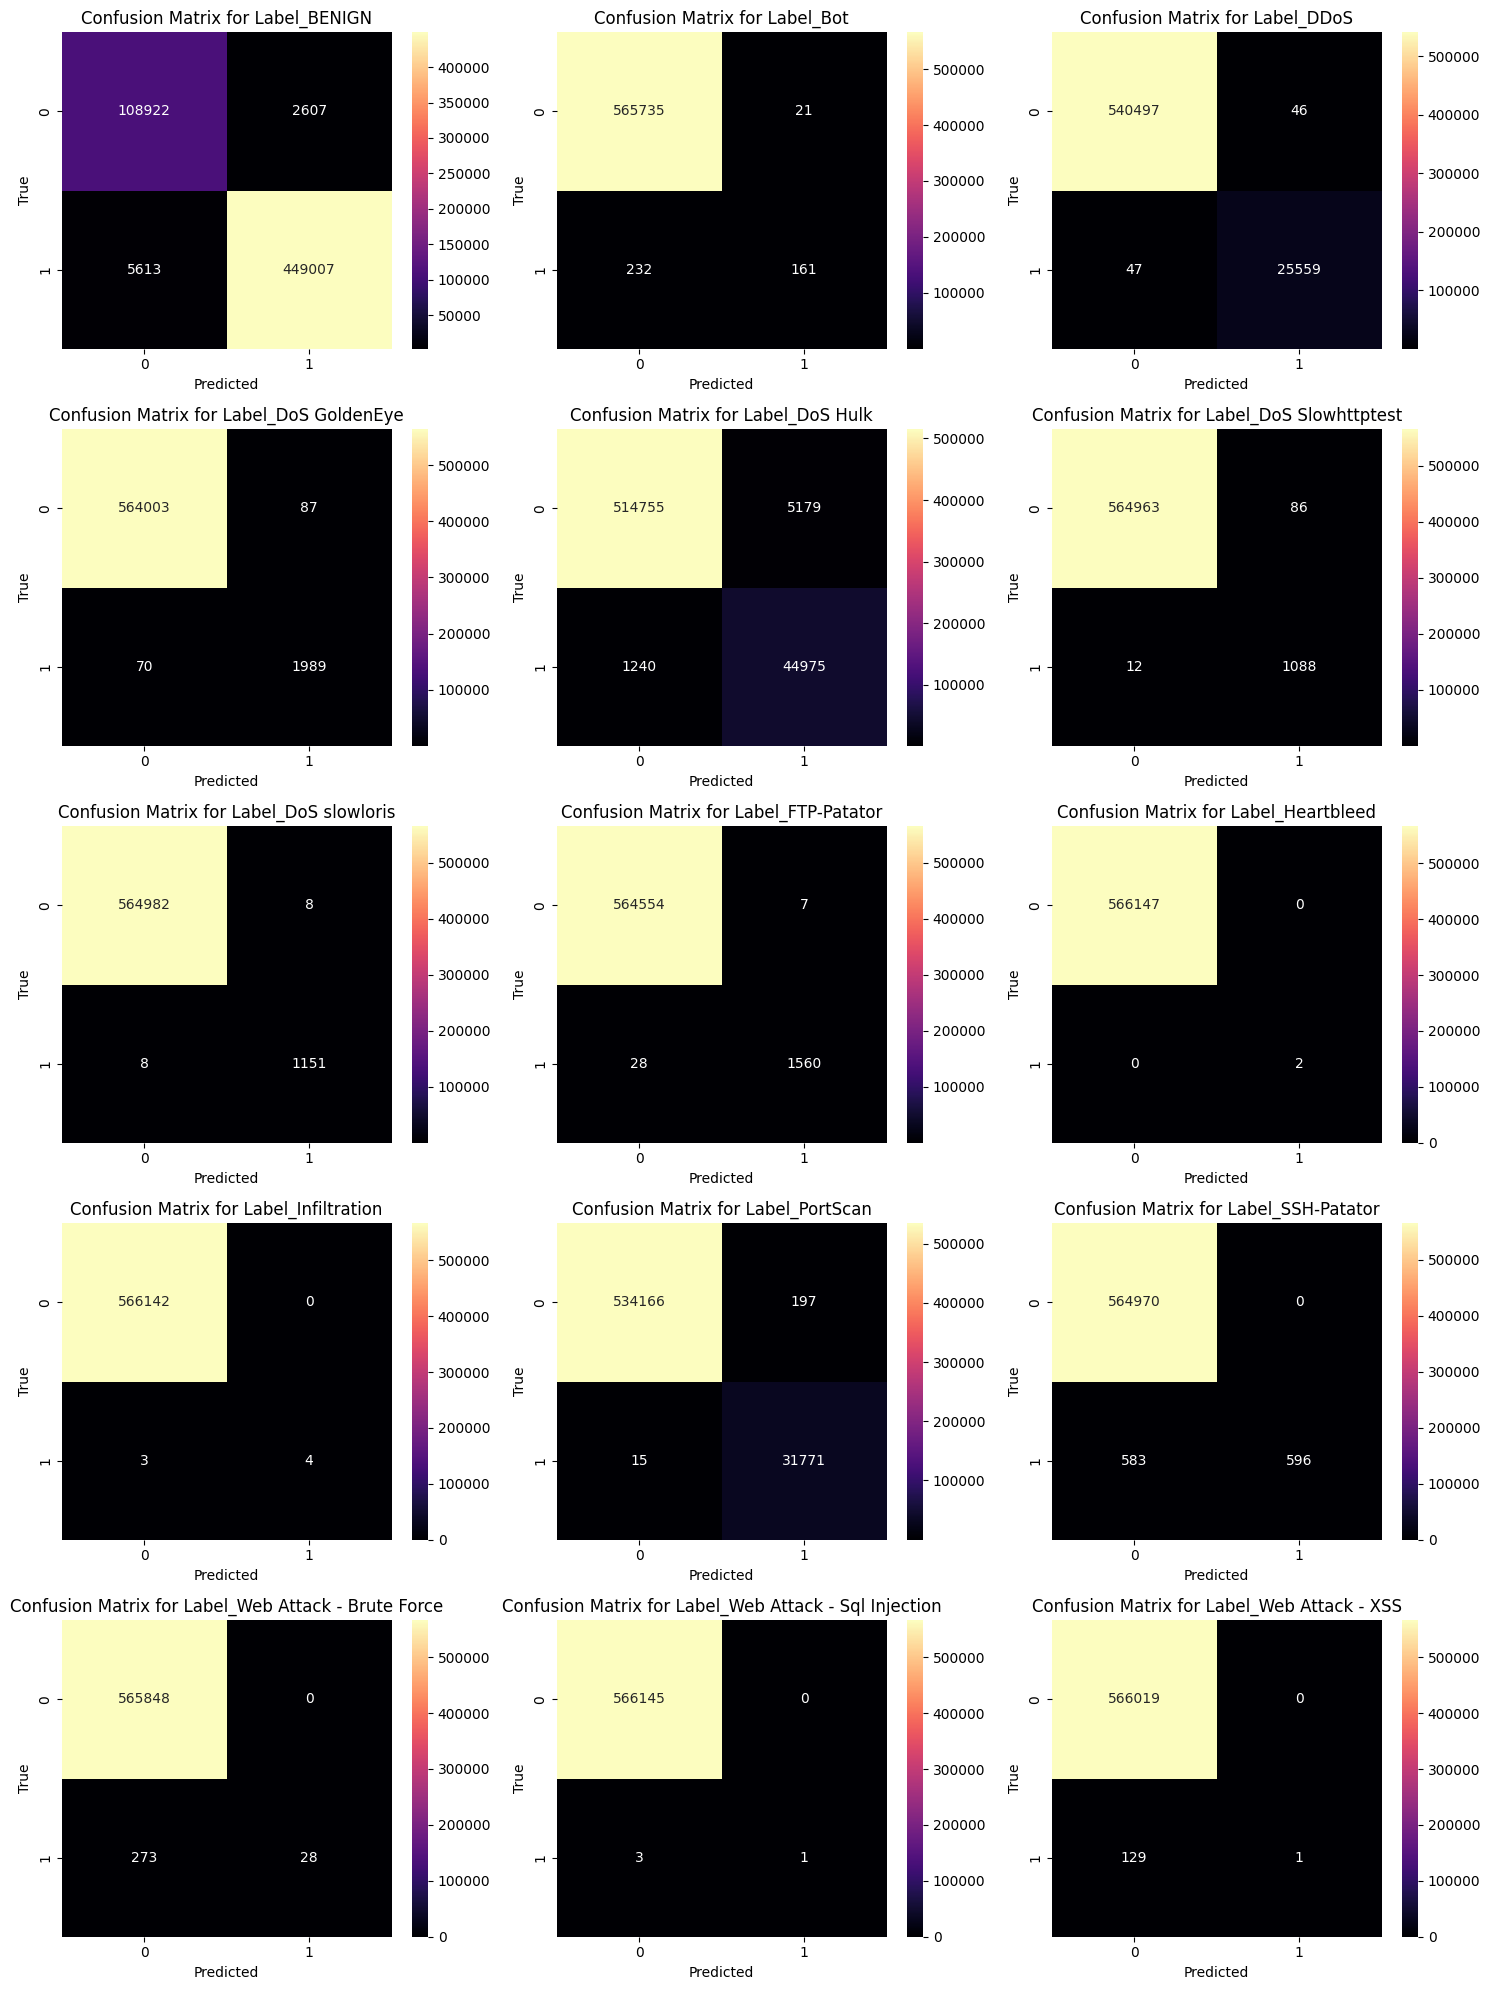

In [ ]:
# Plot confusion matrices for each label
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.ravel()

for i, label in enumerate(class_labels):
    sns.heatmap(multi_conf_matrix[i], annot=True, fmt='d', cmap='magma', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {label}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()

###Pickle File

In [35]:
import pickle

# Load the model
with open("xgb_final_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Check the model type
print(type(loaded_model))  # Ensure it is the expected model class, e.g., xgb.XGBClassifier

# Optionally, check model attributes (e.g., n_estimators or best_params_)
print(loaded_model.get_params())  # Print or inspect the model parameters

<class 'sklearn.multiclass.OneVsRestClassifier'>
{'estimator__objective': 'binary:logistic', 'estimator__base_score': None, 'estimator__booster': None, 'estimator__callbacks': None, 'estimator__colsample_bylevel': None, 'estimator__colsample_bynode': None, 'estimator__colsample_bytree': None, 'estimator__device': None, 'estimator__early_stopping_rounds': None, 'estimator__enable_categorical': False, 'estimator__eval_metric': 'logloss', 'estimator__feature_types': None, 'estimator__gamma': None, 'estimator__grow_policy': None, 'estimator__importance_type': None, 'estimator__interaction_constraints': None, 'estimator__learning_rate': 0.11782175194588543, 'estimator__max_bin': None, 'estimator__max_cat_threshold': None, 'estimator__max_cat_to_onehot': None, 'estimator__max_delta_step': None, 'estimator__max_depth': 9, 'estimator__max_leaves': None, 'estimator__min_child_weight': None, 'estimator__missing': nan, 'estimator__monotone_constraints': None, 'estimator__multi_strategy': None, 'e

In [36]:
import pickle

# Load the saved model
with open("xgb_final_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Sample prediction (assuming X_test_normalized is prepared similarly to training data)
try:
    sample_predictions = loaded_model.predict(X_test_normalized[:5])
    print("Sample Predictions:", sample_predictions)
except Exception as e:
    print("Error during prediction:", e)

Sample Predictions: [[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [37]:
# Evaluate accuracy, F1 score, and other metrics if needed
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Generate predictions for the entire test set
y_pred_load = loaded_model.predict(X_test_normalized)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_load)
print("Accuracy:", accuracy)

# Calculate F1 score (weighted for multilabel compatibility)
f1 = f1_score(y_test, y_pred_load, average='weighted')
print("F1 Score:", f1)

# Optional: Print a classification report for detailed metrics per class
print("\nClassification Report:\n", classification_report(y_test, y_pred_load))

Accuracy: 0.985378407451042
F1 Score: 0.9850788421039114

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    454620
           1       0.88      0.41      0.56       393
           2       1.00      1.00      1.00     25606
           3       0.96      0.97      0.96      2059
           4       0.90      0.97      0.93     46215
           5       0.93      0.99      0.96      1100
           6       0.99      0.99      0.99      1159
           7       1.00      0.98      0.99      1588
           8       1.00      1.00      1.00         2
           9       1.00      0.57      0.73         7
          10       0.99      1.00      1.00     31786
          11       1.00      0.51      0.67      1179
          12       1.00      0.09      0.17       301
          13       1.00      0.25      0.40         4
          14       1.00      0.01      0.02       130

   micro avg       0.99      0.99      0.99    56614